In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
df=pd.read_excel('KTMData.xlsx')

In [3]:
df.head()

,ID,Age,Gender,Occupation,Phone Type,Current Bike,Relationship,Response
0,1,53,Male,Professional,Average,180 to 220,Complicated,Not purchased
1,2,27,Female,Self Employed,Low End,No Bike,Single,Purchased
2,3,39,Female,Unemployed,Average,180 to 220,Married,Not purchased
3,4,20,Female,Unemployed,High End,No Bike,Married,Not purchased
4,5,29,Male,Student,Average,180 to 220,Complicated,Purchased


In [4]:
oe=OrdinalEncoder()

In [5]:
for i in df.columns:
    if df[i].dtype=='object':
        df[i]=oe.fit_transform(df[[i]])

In [6]:
df.drop('ID',axis=1,inplace=True)
df.head()

,Age,Gender,Occupation,Phone Type,Current Bike,Relationship,Response
0,53,1.0,0.0,0.0,1.0,1.0,0.0
1,27,0.0,1.0,2.0,4.0,3.0,1.0
2,39,0.0,3.0,0.0,1.0,2.0,0.0
3,20,0.0,3.0,1.0,4.0,2.0,0.0
4,29,1.0,2.0,0.0,1.0,1.0,1.0


In [7]:
X=df.drop('Response',axis=1)
y=df['Response']
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.3,random_state=1)

In [8]:
model=Sequential([
    Dense(50,activation='relu',input_shape=(X_train.shape[1],)),
    Dense(100,activation='relu'),
    Dense(1,activation='sigmoid')  
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                350       
                                                                 
 dense_1 (Dense)             (None, 100)               5100      
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 5,551
Trainable params: 5,551
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.compile(optimizer='Adam',loss=['binary_crossentropy'],metrics=['accuracy'])

In [23]:
history=model.fit(X_train,y_train,batch_size=500,epochs=10,validation_data=(X_test,y_test))

Epoch 1/10
1/1 [==============================] - 1s 1s/step - loss: 0.5949 - accuracy: 0.7055 - val_loss: 0.6379 - val_accuracy: 0.6453
Epoch 2/10
1/1 [==============================] - 0s 46ms/step - loss: 0.6560 - accuracy: 0.6110 - val_loss: 0.5992 - val_accuracy: 0.7310
Epoch 3/10
1/1 [==============================] - 0s 56ms/step - loss: 0.5873 - accuracy: 0.7758 - val_loss: 0.6391 - val_accuracy: 0.6181
Epoch 4/10
1/1 [==============================] - 0s 50ms/step - loss: 0.5934 - accuracy: 0.6615 - val_loss: 0.6682 - val_accuracy: 0.5880
Epoch 5/10
1/1 [==============================] - 0s 63ms/step - loss: 0.6108 - accuracy: 0.6396 - val_loss: 0.6367 - val_accuracy: 0.6218
Epoch 6/10
1/1 [==============================] - 0s 47ms/step - loss: 0.5870 - accuracy: 0.6857 - val_loss: 0.5998 - val_accuracy: 0.6990
Epoch 7/10
1/1 [==============================] - 0s 55ms/step - loss: 0.5666 - accuracy: 0.7407 - val_loss: 0.5887 - val_accuracy: 0.7281
Epoch 8/10
1/1 [=============

In [24]:
history.history['loss']

[0.5948919653892517,
 0.6559599041938782,
 0.5873318910598755,
 0.5934056043624878,
 0.6107513904571533,
 0.5869889855384827,
 0.5666434168815613,
 0.5709293484687805,
 0.5787317752838135,
 0.5725494027137756]

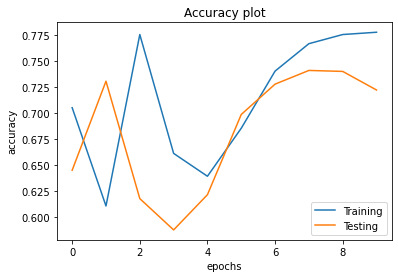

In [25]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Accuracy plot')
plt.legend(['Training','Testing'])

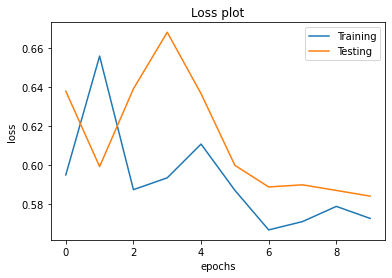

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Loss plot')
plt.legend(['Training','Testing'])